In [1]:
import pandas as pd

In [2]:
client_data = pd.read_csv("client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [3]:
deposit_data = pd.read_csv("deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
calendar_data = pd.read_csv("calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [5]:
df = client_data.merge(deposit_data, on="client_id")

In [6]:
df = df.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [7]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,2019-10-06,Month 5


In [8]:
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5


In [9]:
df["client_geographical_region"].value_counts()

client_geographical_region
West         205629
South        108004
Midwest       88185
Northeast     78576
Name: count, dtype: int64

In [10]:
df["client_residence_status"].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [11]:
df["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

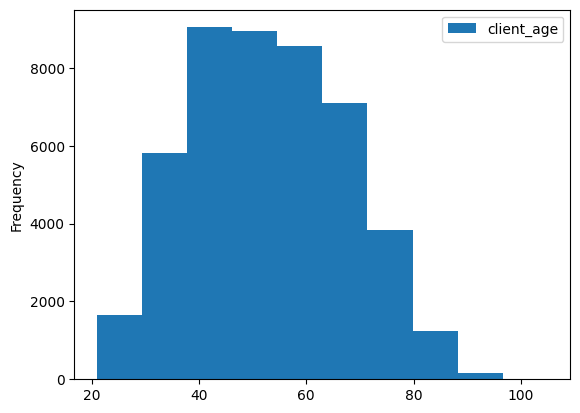

In [12]:
_ = client_data[["client_age"]].plot(kind="hist")

In [13]:
calendar_data["month_name"].value_counts()

month_name
Month 2    31
Month 5    31
Month 3    31
Month 1    30
Month 4    30
Name: count, dtype: int64

In [14]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

In [15]:
df["deposit_type"].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [16]:
df["deposit_cadence"].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

In [17]:
# convert the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

In [18]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


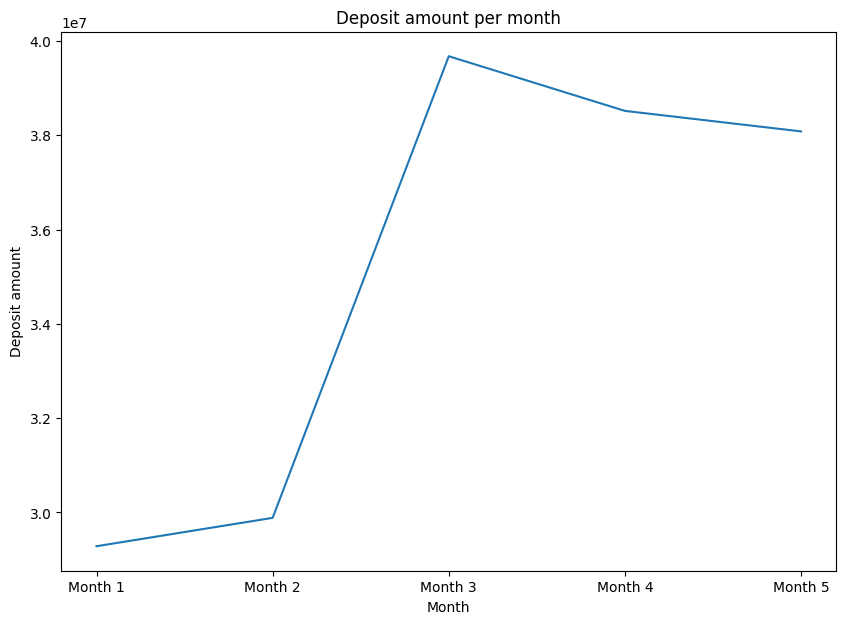

In [19]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

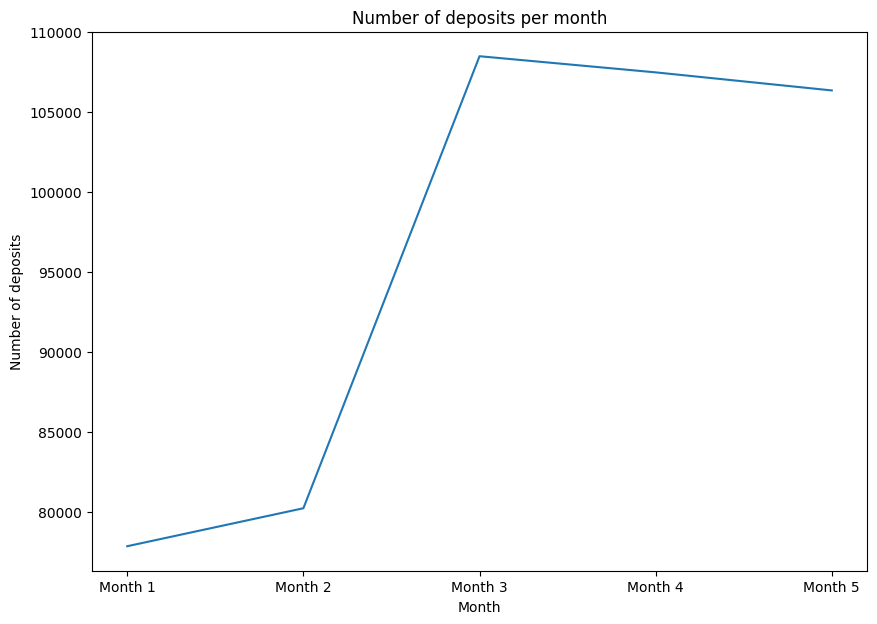

In [20]:
number_of_deposits_by_month = df.groupby(by=df["month_name"]).size()

_ = plt.plot(number_of_deposits_by_month)

_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

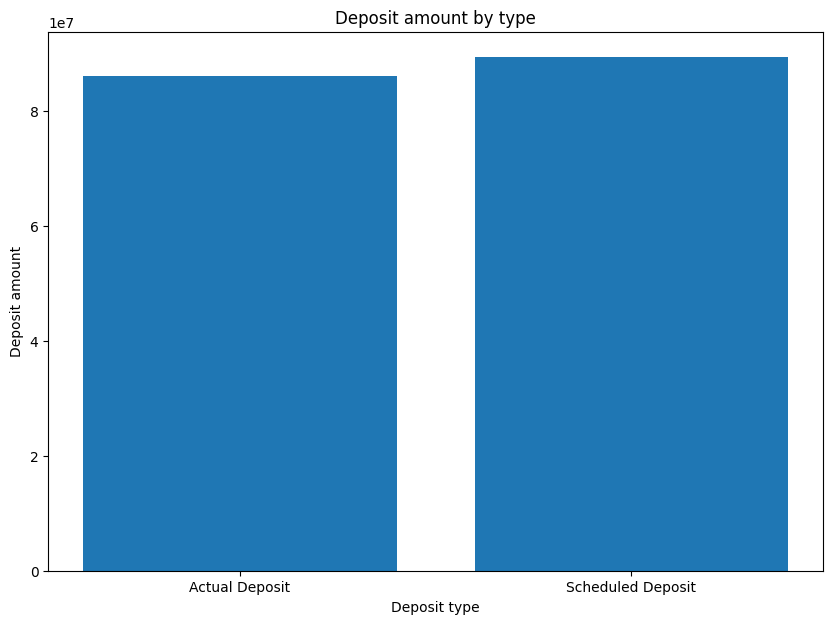

In [21]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)

_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

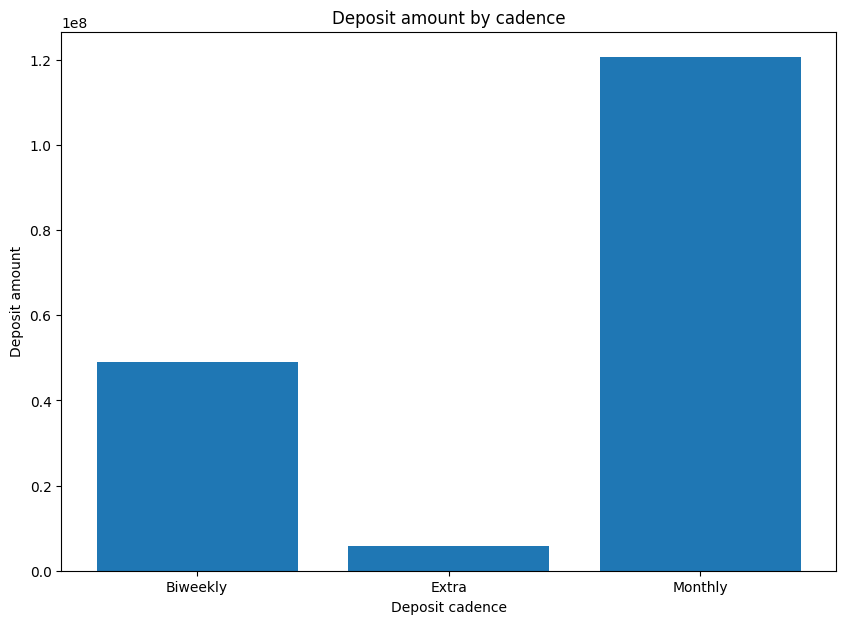

In [22]:
deposit_amount_by_cadence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)

_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

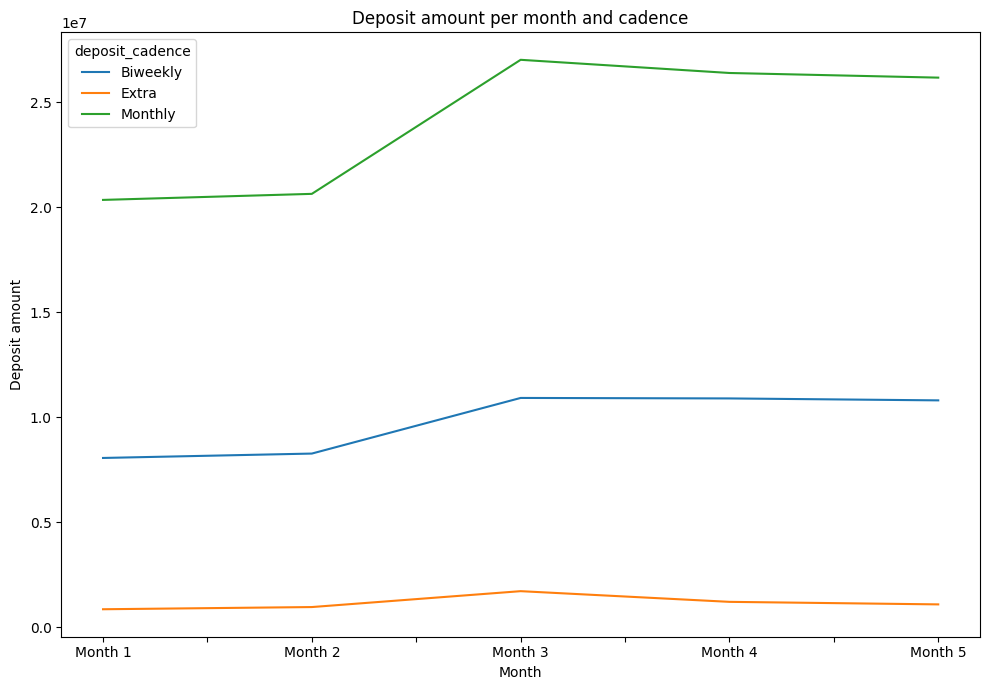

In [23]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

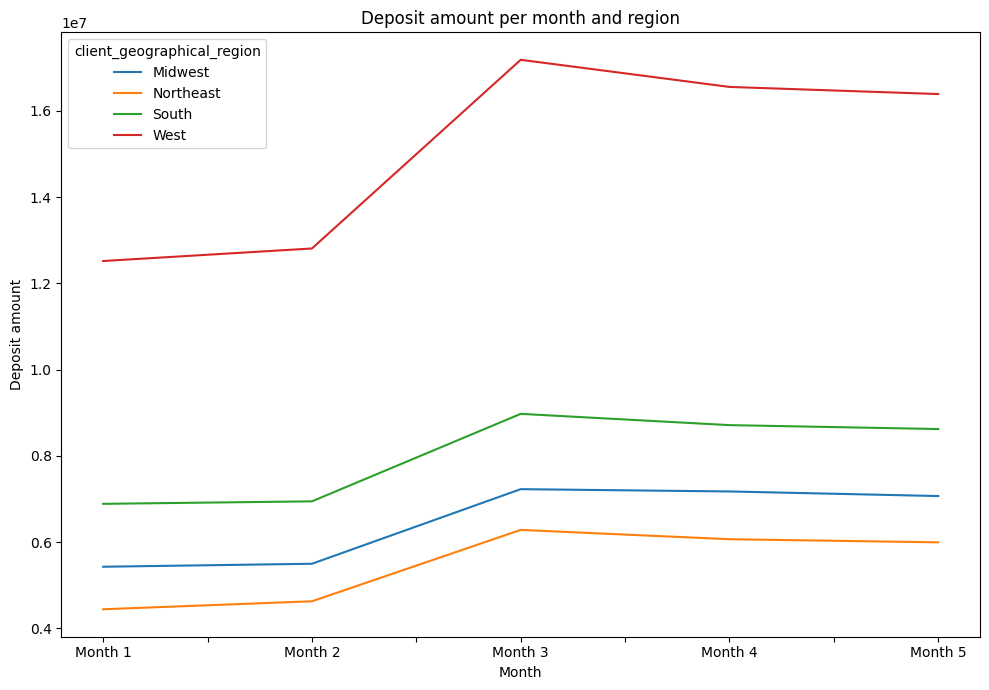

In [24]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

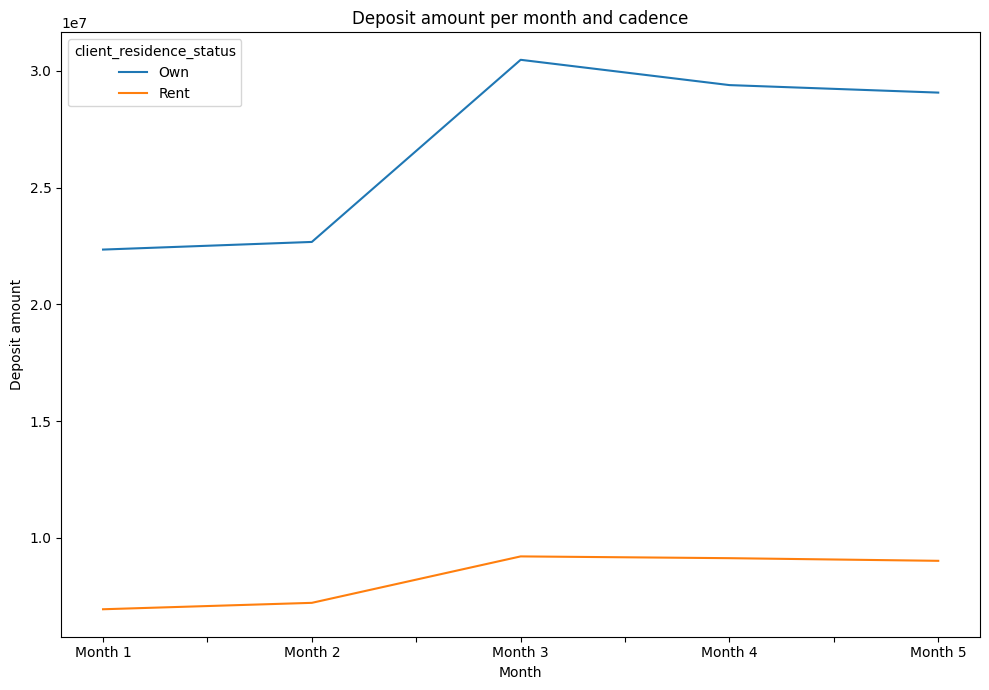

In [25]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

**Question 1**: Conduct a quantitative evaluation of the marketing campaign's effectiveness. What success metric(s) did you choose, and what factors influenced your selection?

**Answer**: The deposit amount per month plot shows a significant spike during Month 8 (August), when the ad campaign was running. Deposits increased by nearly **\$10M** that month and remained elevated, though gradually declining, at **\$8.5M** the next month and **\$8M** in the final month of data.

The campaign cost **\$5M**, while deposits increased by **\$26.5M**. Assuming the lowest **18% fee**, this results in **\$4.77M** in revenue, appearing as a **\$230K loss**. However, the campaign likely had a stronger long-term impact, and the actual fees may be higher, making this a conservative estimate.


Another quantitative assessment that we can make is to see the number of new clients that were brought in during and after the market campaign.

In [26]:
clients_before_campaign = df[(df["month_name"] == "Month 1")
                           | (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [27]:
clients_during_campaign = df[(df["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [28]:
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

**Question 1.1**: How many new clients were acquired while the ad campaign was running?

In [29]:
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

**Question 1.2**: How many after the campaign?

In [30]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

**Question 2**: Based on the data, what adjustments would you recommend for future campaign strategies to enhance performance?

**Answer:** Almost all of the plots show similar patterns through time, making it difficult to draw clear suggestions.  

One aspect worth exploring further is **targeted marketing**. The data indicates that most individuals are **middle-aged (40-60 years old)** and **homeowners**. This is evident from the **age histogram** and the **count per residence status** in the EDA section.  

In the next plot, we will visualize the **deposit amount over time** grouped by **age (divided by 10).**


In [31]:
def discretize_age(row):
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(discretize_age, axis=1)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5,8
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3,8
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3,8
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4,8
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4,8
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5,8


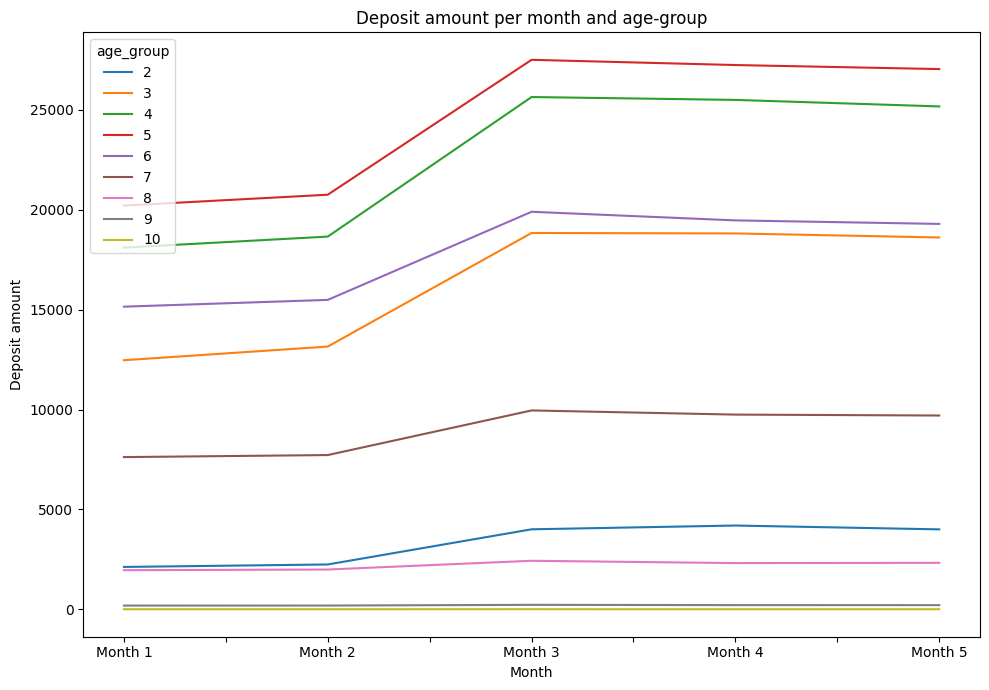

In [32]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe big increase in middle-aged customers and little to no increase in very young or very old customers. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [33]:
df_q2 = df[(df["client_residence_status"] == "Own") 
         & (df["client_age"] <= 60) 
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

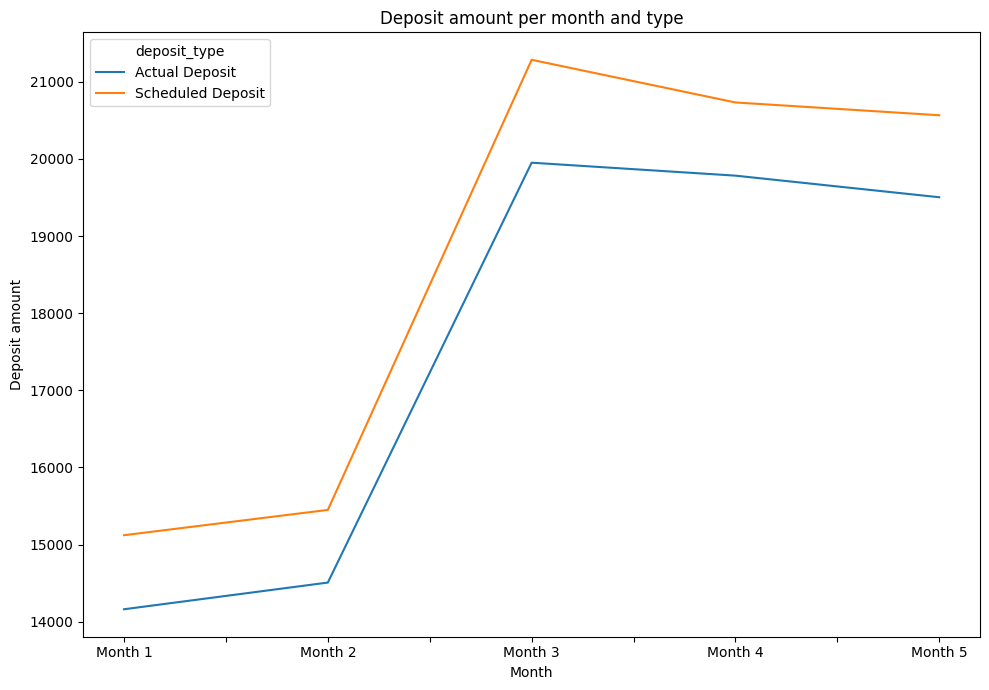

In [34]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.

In [35]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

extra_deposit_df_q2 / extra_deposit_df

np.float64(0.4234867523021418)

In [36]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

We can further explore the extra deposits to identify client groups that are of interest.

In [37]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

client_geographical_region
West         3570
South        1991
Midwest      1486
Northeast    1300
Name: count, dtype: int64

In [38]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

client_residence_status
Own     5856
Rent    2491
Name: count, dtype: int64

In [39]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

deposit_type
Actual Deposit    8347
Name: count, dtype: int64

In [40]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

month_name
Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: count, dtype: int64

Most extra deposits are observed in the West region, aligning with other deposit types. Homeowners are 2.33 times more likely to deposit extra than renters. The highest extra deposits occurred in Month 3 during the campaign, with post-campaign deposits remaining 33% higher than pre-campaign levels.









**Question 3**: How do you think the campaign's performance would have differed if it had been postponed to Month 6 instead of running in Month 3?

To simulate the campaign's postponement, we can shift the deposits of new clients acquired in Month 3. We assume that clients making their first deposit in Month 3 were influenced by the campaign—while not necessarily accurate, we treat it as such for this exercise.

**Steps to Implement**:
1. Identify clients who made their first deposit in Month 3 (already done in previous sections).
2. Shift their deposit dates forward by three months (i.e., after Month 5).
3. Re-run the analyses from Question 1 and summarize the differences in results.

In [41]:
df_copy = df.copy(deep=True)

In [42]:
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [43]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [44]:
df_copy["deposit_date"].max()

Timestamp('2020-01-29 00:00:00')

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


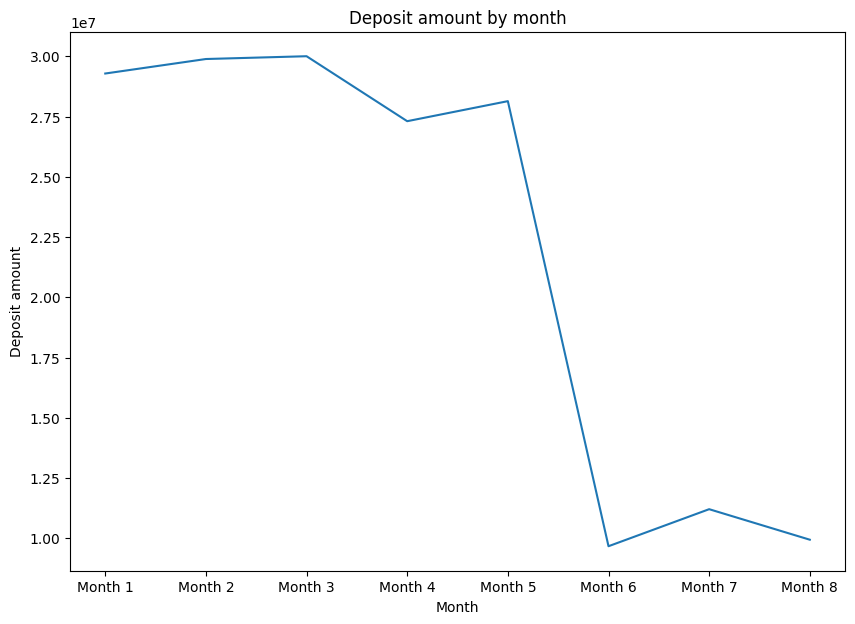

In [45]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots appear unusual because, in Months 6, 7, and 8, the data only includes deposits from new customers, which are significantly lower than usual.

To account for deposits from existing customers, we can estimate their contributions by adding the average deposit amount from previous months.

In [46]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()

In [47]:
avg_monthly_deposit

np.float64(21930414.27375)

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


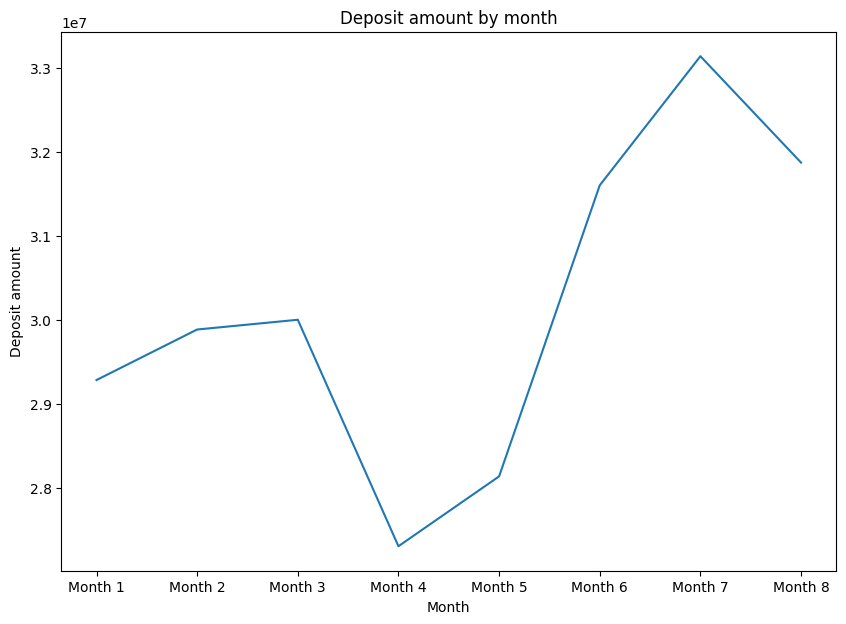

In [48]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()


deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)


_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The simulation reveals a significant increase in deposits, with key differences from the findings in Question 1:

The simulation reveals a significant increase in deposits, with key differences from the findings in Question 1:

- During the campaign month, **Freedom Debt Relief** saw a **\$2.5 million** rise in deposits compared to previous months, far lower than the **\$10 million** observed in Question 1.  
- The following month, deposits continued to grow, peaking at **\$33 million**, before slightly dropping to **$31 million** in the last month, still above pre-campaign levels.  
- With a **\$5 million** campaign cost, the total deposit increase was **\$8 million**, significantly lower than the **\$26 million** seen in **Question 1**, where profitability was already marginal.  

**Conclusion: These results suggest thatpostponing the campaign would not have been a better strategy**.
